In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [126]:
train = pd.read_csv('/kaggle/input/titanic/train.csv')
test = pd.read_csv('/kaggle/input/titanic/test.csv')

In [127]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [128]:
test.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [129]:
train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [130]:
train['Sex'].unique()

array(['male', 'female'], dtype=object)

In [131]:
train['Ticket'].unique()

array(['A/5 21171', 'PC 17599', 'STON/O2. 3101282', '113803', '373450',
       '330877', '17463', '349909', '347742', '237736', 'PP 9549',
       '113783', 'A/5. 2151', '347082', '350406', '248706', '382652',
       '244373', '345763', '2649', '239865', '248698', '330923', '113788',
       '347077', '2631', '19950', '330959', '349216', 'PC 17601',
       'PC 17569', '335677', 'C.A. 24579', 'PC 17604', '113789', '2677',
       'A./5. 2152', '345764', '2651', '7546', '11668', '349253',
       'SC/Paris 2123', '330958', 'S.C./A.4. 23567', '370371', '14311',
       '2662', '349237', '3101295', 'A/4. 39886', 'PC 17572', '2926',
       '113509', '19947', 'C.A. 31026', '2697', 'C.A. 34651', 'CA 2144',
       '2669', '113572', '36973', '347088', 'PC 17605', '2661',
       'C.A. 29395', 'S.P. 3464', '3101281', '315151', 'C.A. 33111',
       'S.O.C. 14879', '2680', '1601', '348123', '349208', '374746',
       '248738', '364516', '345767', '345779', '330932', '113059',
       'SO/C 14885', '31012

In [132]:
train['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [133]:
train['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [134]:
train['Survived'].unique()

array([0, 1])

In [135]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [136]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [137]:
train.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

In [138]:
train.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

In [139]:
train.shape

(891, 12)

In [140]:
numerical_cols_train = train.select_dtypes(include=['int64', 'float64']).drop(columns=['PassengerId']).columns
categorical_cols_train = train.select_dtypes(include=['object']).drop(columns=['Name']).columns

In [141]:
categorical_cols_train

Index(['Sex', 'Ticket', 'Cabin', 'Embarked'], dtype='object')

In [142]:
numerical_cols_train

Index(['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

In [143]:
train['Survived'] = train['Survived'].fillna(train['Survived'].mode()[0])
for col in numerical_cols_train:
    train[col] = train[col].fillna(train[col].median())

for col in categorical_cols_train:
    train[col] = train[col].fillna(train[col].mode())


In [144]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,B96 B98,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,G6,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated a

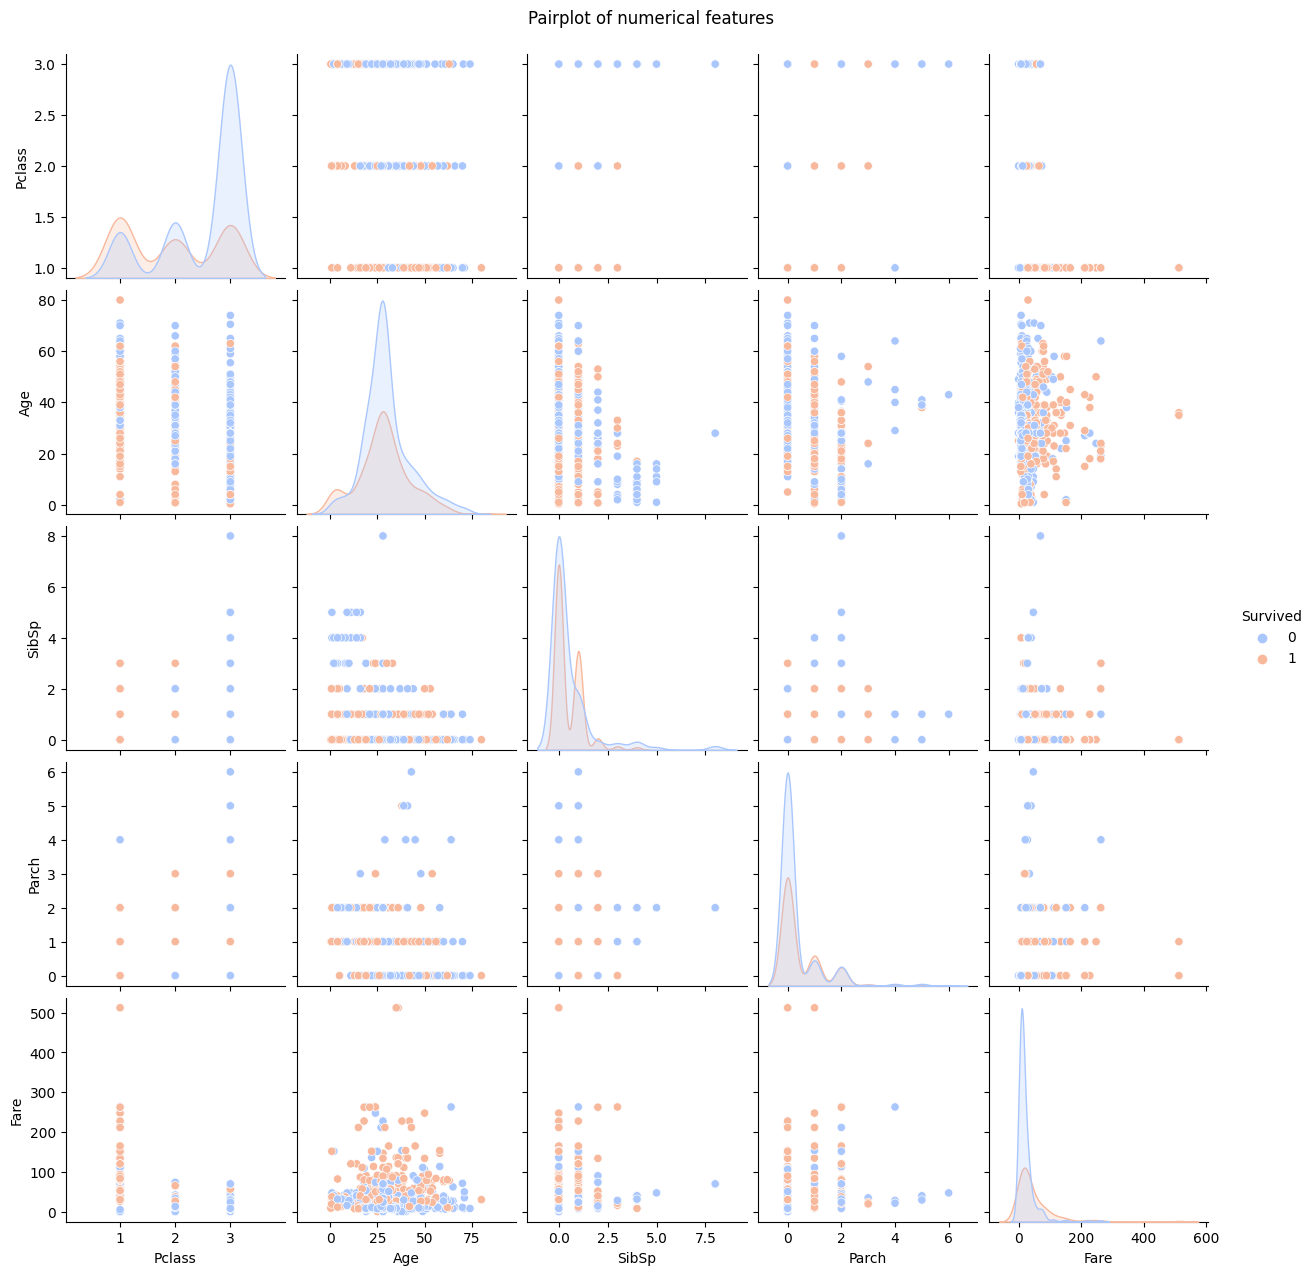

In [145]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(train, vars=['Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], hue='Survived', palette='coolwarm')
plt.suptitle('Pairplot of numerical features', y=1.02)
plt.show()

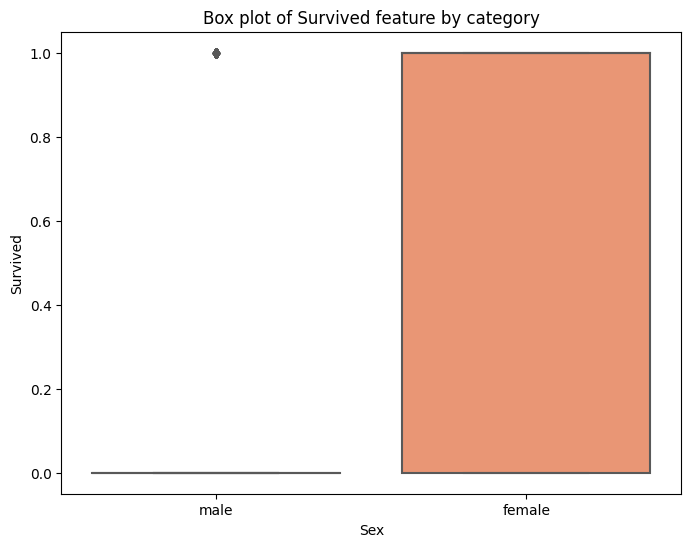

In [146]:
# ['Sex', 'Ticket', 'Cabin', 'Embarked']

plt.figure(figsize=(8, 6))
sns.boxplot(x='Sex', y='Survived', data=train, palette='Set2')
plt.title('Box plot of Survived feature by category')
plt.xlabel('Sex')
plt.ylabel('Survived')
plt.show()

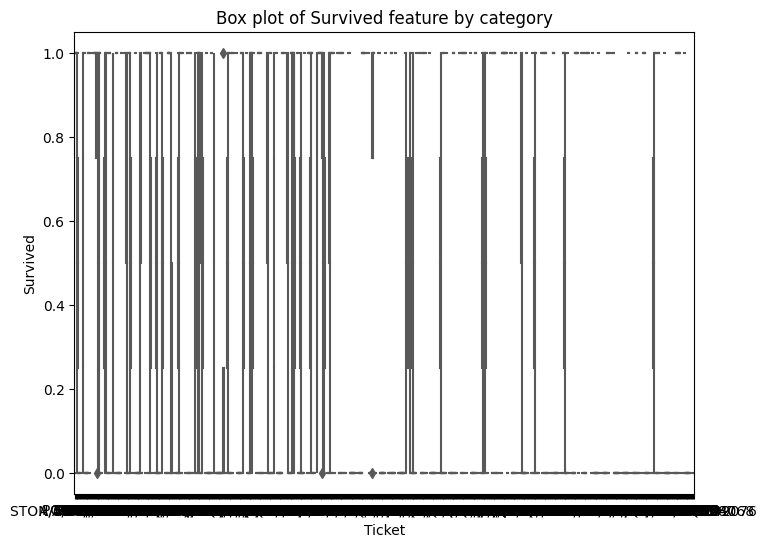

In [147]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Ticket', y='Survived', data=train, palette='Set2')
plt.title('Box plot of Survived feature by category')
plt.xlabel('Ticket')
plt.ylabel('Survived')
plt.show()

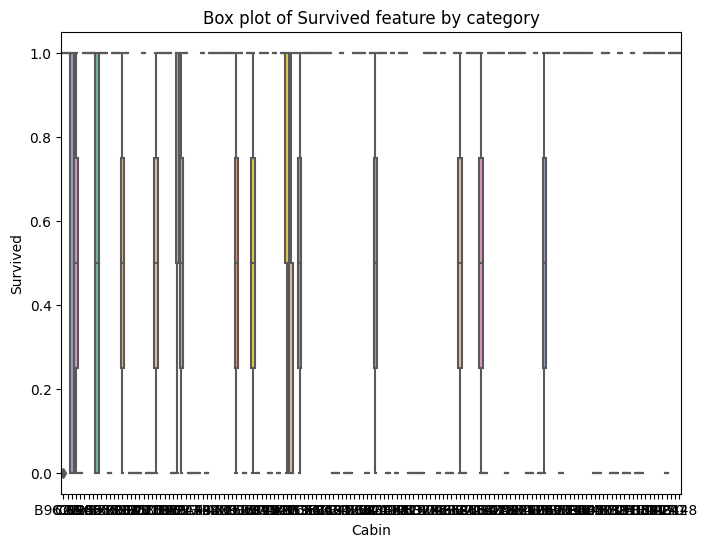

In [148]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Cabin', y='Survived', data=train, palette='Set2')
plt.title('Box plot of Survived feature by category')
plt.xlabel('Cabin')
plt.ylabel('Survived')
plt.show()

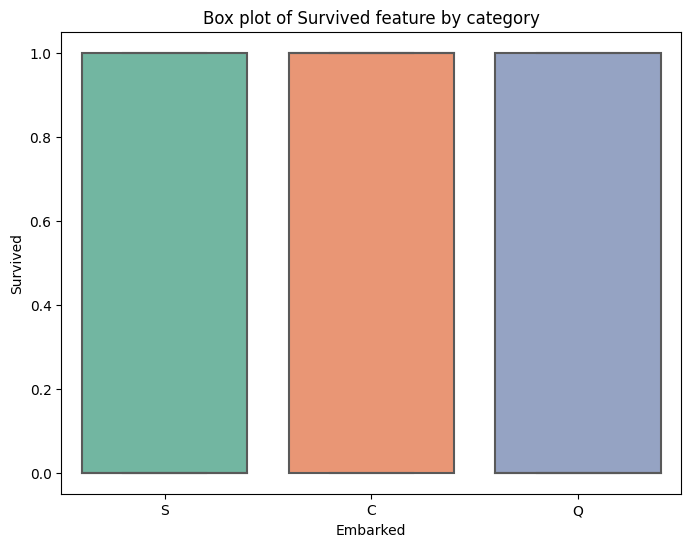

In [149]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Embarked', y='Survived', data=train, palette='Set2')
plt.title('Box plot of Survived feature by category')
plt.xlabel('Embarked')
plt.ylabel('Survived')
plt.show()

In [150]:
categorical_cols_train = categorical_cols_train.drop('Embarked')

In [151]:
categorical_cols_train

Index(['Sex', 'Ticket', 'Cabin'], dtype='object')

In [152]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.361582,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.019697,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [154]:
from sklearn.preprocessing import RobustScaler, LabelEncoder, OneHotEncoder

numerical_cols_train = train.select_dtypes(include=['int64', 'float64']).drop(columns=['PassengerId']).columns

scaler = RobustScaler()
train_numeric = train[numerical_cols_train]
train[numerical_cols_train] = scaler.fit_transform(train_numeric)

le = LabelEncoder()

# def one_hot_encode_and_add(df, column):
#     one_hot_encoder = OneHotEncoder(sparse_output=False)
#     one_hot_encoded = one_hot_encoder.fit_transform(df[[column]])
#     encoded_columns = pd.DataFrame(one_hot_encoded, columns=one_hot_encoder.get_feature_names_out([column]))
#     encoded_columns.index = df.index
#     df = pd.concat([df, encoded_columns], axis=1)
#     df = df.drop(columns=[column])
#     return df
    

# categorical_cols_train_copy = categorical_cols_train.copy()

# for col in categorical_cols_train_copy:
#     train = one_hot_encode_and_add(train, col)

for col in categorical_cols_train:
    train[col] = le.fit_transform(train[col])

train_categoric = train[categorical_cols_train]
train[categorical_cols_train] = scaler.fit_transform(train_categoric)
train[categorical_cols_train]

,Sex,Ticket,Cabin
0,0.0,0.515235,-100.0
1,-1.0,0.717452,-66.0
2,-1.0,0.919668,-2.0
3,-1.0,-0.797784,-92.0
4,0.0,0.373961,0.0
...,...,...,...
886,0.0,-0.653740,0.0
887,-1.0,-0.894737,-117.0
888,-1.0,0.936288,0.0
889,0.0,-0.911357,-87.0


In [155]:
train[numerical_cols_train]

,Survived,Pclass,Age,SibSp,Parch,Fare
0,0.0,0.0,-0.461538,1.0,0.0,-0.312011
1,1.0,-2.0,0.769231,1.0,0.0,2.461242
2,1.0,0.0,-0.153846,0.0,0.0,-0.282777
3,1.0,-2.0,0.538462,1.0,0.0,1.673732
4,0.0,0.0,0.538462,0.0,0.0,-0.277363
...,...,...,...,...,...,...
886,0.0,-1.0,-0.076923,0.0,0.0,-0.062981
887,1.0,-2.0,-0.692308,0.0,0.0,0.673281
888,0.0,0.0,0.000000,1.0,2.0,0.389604
889,1.0,-2.0,-0.153846,0.0,0.0,0.673281


In [171]:
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.metrics import classification_report, f1_score
from sklearn.ensemble import RandomForestClassifier



cols_to_drop = ['Survived', 'Name', 'PassengerId', 'Embarked']

X = train.drop(columns=cols_to_drop, axis=1)
y = train['Survived']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# params = {
#     'n_estimators': 1000,
#     'max_depth': 9,
#     'learning_rate': 0.02,
#     'subsample': 0.9,
#     'colsample_bytree': 0.9,
#     'min_child_weight': 1,
#     'gamma': 0.04,
#     'alpha': 0.04,
#     'lambda': 0.7,
#     'objective': 'binary:logistic',  # For binary classification
#     'eval_metric': 'logloss',
#     'random_state': 42,
#     'n_jobs': -1,
#     'tree_method': 'hist',
#     'early_stopping_rounds': 20,
#     'grow_policy': 'lossguide'
# }

# final_model = xgb.XGBClassifier(**params)
# final_model.fit(X_train, y_train, eval_set=[(X_val, y_val)], verbose=False)

final_model = RandomForestClassifier(n_estimators=100, random_state=42)
final_model.fit(X_train, y_train)

# Make predictions on validation set
y_pred = final_model.predict(X_val)

# Print classification report
print("\nClassification Report:")
print(classification_report(y_val, y_pred))


Classification Report:
              precision    recall  f1-score   support

         0.0       0.83      0.88      0.85       110
         1.0       0.79      0.71      0.75        69

    accuracy                           0.82       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.82      0.81       179



**# Test Data**

In [157]:
numerical_cols_test = test.select_dtypes(include=['int64', 'float64']).drop(columns=['PassengerId']).columns
categorical_cols_test = test.select_dtypes(include=['object']).drop(columns=['Name']).columns

In [158]:
for col in numerical_cols_test:
    test[col] = test[col].fillna(test[col].median())

for col in categorical_cols_test:
    test[col] = test[col].fillna(test[col].mode())

In [159]:
categorical_cols_test = categorical_cols_test.drop('Embarked')

In [160]:
scaler = RobustScaler()
test_numeric = test[numerical_cols_test]
test[numerical_cols_test] = scaler.fit_transform(test_numeric)

le = LabelEncoder()
for col in categorical_cols_test:
    test[col] = le.fit_transform(test[col])

test_categoric = test[categorical_cols_test]
test[categorical_cols_test] = scaler.fit_transform(test_categoric)
test[categorical_cols_test]

,Sex,Ticket,Cabin
0,0.0,-0.149100,-61.0
1,-1.0,0.205656,0.0
2,0.0,-0.555270,0.0
3,0.0,-0.174807,0.0
4,-1.0,-0.221080,0.0
...,...,...,...
413,0.0,0.442159,0.0
414,-1.0,0.735219,-54.0
415,0.0,0.848329,0.0
416,0.0,0.200514,0.0


In [161]:
cols_to_drop = ['Name', 'PassengerId', 'Embarked']

X_test = test.drop(columns=cols_to_drop, axis=1)
y_test_res = final_model.predict(X_test)

preds = [int(yt) for yt in y_test_res]

output = pd.DataFrame({
    'PassengerId': test.PassengerId,
    'Survived': preds
})
output.to_csv('submission_3.csv', index=False)